In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import mrob

In [2]:
import sklearn.datasets

mean = np.array(0)
sigma = 0.03
norm_var = scipy.stats.multivariate_normal(mean,sigma)

In [35]:
N = 100_000
xi = np.zeros((N,6))
xi[:,1] = norm_var.rvs(N)/5
xi[:,2] = norm_var.rvs(N)
xi[:,3] = [1]*N + scipy.stats.multivariate_normal(0,0.00005).rvs(N)

In [36]:
df = pd.DataFrame(xi)

In [37]:
print(df)

         0         1         2         3    4    5
0      0.0  0.015200 -0.164769  0.988136  0.0  0.0
1      0.0 -0.006346  0.036558  1.000604  0.0  0.0
2      0.0  0.029661 -0.081671  0.994049  0.0  0.0
3      0.0 -0.035647  0.357900  0.989375  0.0  0.0
4      0.0  0.012111  0.126388  0.985183  0.0  0.0
...    ...       ...       ...       ...  ...  ...
99995  0.0 -0.044495 -0.003507  0.996961  0.0  0.0
99996  0.0  0.016822  0.279686  1.003218  0.0  0.0
99997  0.0  0.021200 -0.416689  1.004427  0.0  0.0
99998  0.0  0.021086  0.107837  1.001423  0.0  0.0
99999  0.0 -0.039795  0.087025  1.010962  0.0  0.0

[100000 rows x 6 columns]


In [38]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)

In [39]:
T_0 = mrob.geometry.SE3([0,0,0,0,0,0])
print(T_0.T())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [40]:
propagated = []


for i in range(len(xi)):
    tmp = mrob.geometry.SE3([0,0,0,0,0,0])
    tmp.update_rhs(xi[i])
    propagated.append(tmp)

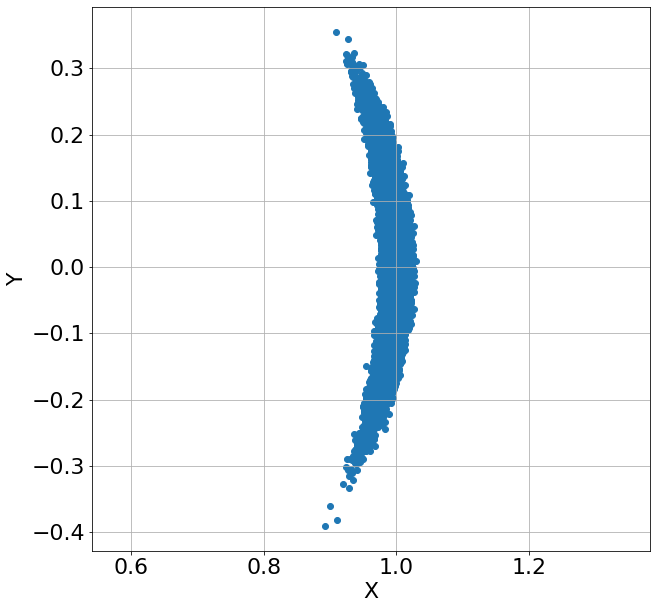

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

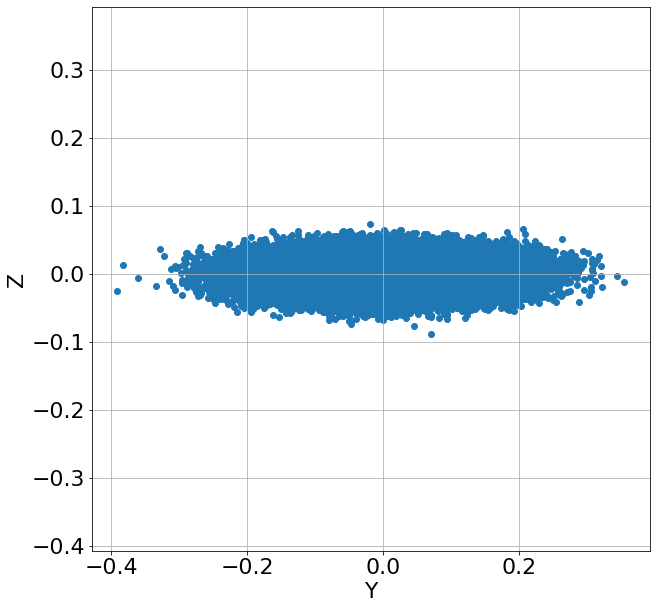

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,1],poses[:,2])
plt.xlabel("Y")
plt.ylabel("Z")
plt.grid()
plt.axis('equal')
plt.show()